In [1]:
import fsps
import numpy as np
import pandas as pd
import astropy.cosmology as cos
from astropy.cosmology import FlatLambdaCDM
import unyt as u
import pickle
import matplotlib.pyplot as plt

In [2]:
def read_cloudy_in(file):
    df = pd.read_csv(file,
                     header = None,
                    skiprows = 5,
                    skipfooter = 3,
                    delim_whitespace = True)
    
    df = df.drop(columns = 0)
    
    for i in range(len(df[1])):
        df[1][i] = float(df[1][i].replace(")","").replace("(",""))
        df[2][i] = float(df[2][i].replace(")","").replace("(",""))
    
    return df

In [2]:
rs_list = [2,2.5,3]

wave = 1
spec = 23

spec_dat = {}
for rs in rs_list:
    age = univ_age - FlatLambdaCDM(H0=70,Om0=0.3).lookback_time(rs).to_value()


NameError: name 'univ_age' is not defined

In [3]:
with open("spec_dat.pickle",'rb') as b:
        dat = pickle.load(b)

dat[20].keys()

dict_keys([1.259, 1.37, 1.487, 1.609, 1.737, 1.871, 2.013, 2.16, 2.316, 2.479, 2.649])

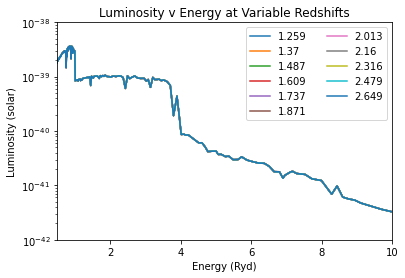

In [4]:
for rs in dat[20].keys():
    
    spec = dat[20][rs]['spec']
    wave = dat[20][rs]['wave'] 
    
    d_cm = 20*3.086e+21
    spec = spec/(16*np.pi**2*d_cm**2) 

    lum = spec*(3e8/(wave*1e-10))

    Ryd = 2.1798723611035e-18 * u.J
    nwave = wave * u.Angstrom
    nu = nwave.to("J", equivalence="spectral") / Ryd
    nu = nu.to_value()
    
    plt.plot(nu,lum,label = rs)
    
# plt.xscale('log')
plt.xlim(0.5,10)
plt.yscale('log')
plt.ylim(10**(-42),10**(-38))
plt.xlabel("Energy (Ryd)")
plt.ylabel("Luminosity (solar)")
plt.title("Luminosity v Energy at Variable Redshifts")
plt.legend(ncol = 2)

In [5]:
om = pd.read_csv("/mnt/home/tairaeli/astro_libs/PyCEE/omega_dat.csv")
met = om["metal"]
np.min(met)

0.0

In [6]:
put_dat = read_cloudy_in("/mnt/home/tairaeli/astro_libs/cloudy_cooling_tools/examples/grackle/P19_UVB/z_2.6490e+00.out")
kpc20 = read_cloudy_in("/mnt/gs21/scratch/tairaeli/20_kpc_dat/z_2.6490e+00.out")


/opt/software/Python/3.6.4-foss-2018a/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [7]:
ptw_file = '/mnt/home/tairaeli/Junk/cloudy_cooling_tools_degraded/examples/ion_balance/test_bin/puchwein19_bkgthick.out'

ptw_rs = np.genfromtxt(ptw_file, max_rows = 1)
ptw_data = np.genfromtxt(ptw_file, skip_header=11)

ptw_wave = ptw_data[:,0]

rs_range = [1.2,2.7]
rs_mask0 = np.where((ptw_rs>=rs_range[0]) & (ptw_rs<=rs_range[1]))

ptw_rs = ptw_rs[rs_mask0]
ptw_data = ptw_data[:,rs_mask0]

# rebins spectral data to better match Cloudy's desired input
def rebin(wave,spec,ptw_spec):
    
    # convert spectral data into luminosities
    lum = spec*(3e8/(wave*1e-10))
    
    nlum = np.zeros(len(ptw_wave))
    
    # compare wave data from FSPS to desired wave binning to rebin spec data
    for i in range(ptw_wave.size):
        # accounting for indexing issues in first bin
        if i == 0:
            nlum[i] = sum(lum[np.where((wave<=ptw_wave[i]))])
        else:
            nlum[i] = sum(lum[np.where((wave<=ptw_wave[i])&(wave>ptw_wave[i-1]))])
    # converting luminosities back into intensity
    nspec = nlum*((ptw_wave*1e-10)/3e8)
    nspec = nspec + ptw_spec
    return nspec

def round_arr(arr):
    iout = []
    for i in range(len(arr)):
        iout.append(float(f"{arr[i]:.10f}"))
    return np.asarray(iout)

(626, 1, 11)


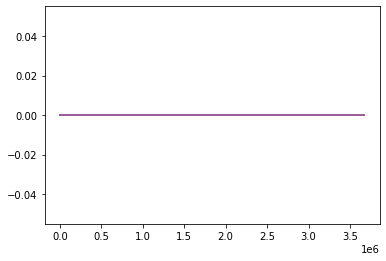

In [10]:
wave = dat[20][2.013]['wave']
wav = ptw_wave*u.Angstrom
Ryd = 2.1798723611035e-18 * u.J

dlis = [20,50,100,150,200]
speclis = []
ptw_spec = ptw_data[:,0,-1]
print(ptw_data.shape)
nu = wav.to("J", equivalence="spectral") / Ryd
nu = np.flip(nu.to_value())
for d in dlis:
    d_cm = d*3.086e+21
    spec = dat[d][2.649]['spec']/(16*np.pi**2*d_cm**2)
    
    new_I = rebin(wave,spec,ptw_spec)
                                        
    speclis.append(np.log10(new_I))
    plt.plot(nu,new_I-ptw_spec)
#     plt.plot(nu,np.flip(ptw_spec))
# plt.yscale("log")

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [28]:
iout = []

for i in range(len(dat[20][2.649]['rebin_spec'])):
#     iout.append(float(f"{dat[20][2.649]['rebin_spec'][i]:.10f}"))
    iout.append(float(f"{speclis[0][i]:.10f}"))
    print()
iout = np.asarray(iout)

In [29]:
iout

array([-32.18362611, -31.10796108, -31.0725783 , -31.03715732,
       -31.00178427, -30.96657624, -30.93107239, -30.89551289,
       -30.86012091, -30.8247782 , -30.78941398, -30.7539941 ,
       -30.71851211, -30.68319125, -30.64781748, -30.61243222,
       -30.57691804, -30.54151324, -30.50612389, -30.4708264 ,
       -30.43533394, -30.40000782, -30.3646168 , -30.32919772,
       -30.29379446, -30.24343996, -30.16027062, -30.05041485,
       -29.92009553, -29.78198996, -29.64454848, -29.50668139,
       -29.37232697, -29.24214866, -29.11492162, -28.99396204,
       -28.87680192, -28.76346274, -28.65501859, -28.54990492,
       -28.44867201, -28.3513473 , -28.25696085, -28.16698045,
       -28.07998108, -27.99567863, -27.91470942, -27.83594471,
       -27.75995023, -27.68676571, -27.61618463, -27.54852059,
       -27.48306819, -27.41941712, -27.35783237, -27.29782805,
       -27.23957752, -27.18283143, -27.12755235, -27.07443009,
       -27.0228711 , -26.97265039, -26.92372374, -26.87

Text(0.5, 0, 'E (Ryd)')

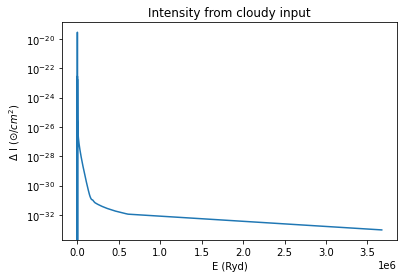

In [137]:
# plt.plot(nu,10**(np.flip(iout))- 10**(put_dat[2]))
plt.plot(nu,10**(np.flip(speclis[0]))- 10**(put_dat[2]))

plt.yscale("log")
# plt.xlim([0,0.2e6])
plt.title("Intensity from cloudy input")
plt.ylabel("$\Delta$ I ($\odot$/$cm^2$)")
plt.xlabel("E (Ryd)")

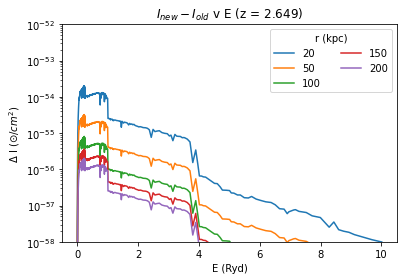

In [11]:
for d in dlis:
    spec = dat[d][2.013]['spec']/(16*np.pi**2*(d*3.086e+21)**2)
    wave = dat[d][2.013]['wave']*u.Angstrom
    nu = wave.to("J", equivalence="spectral") / Ryd
    nu = nu.to_value()
    plt.plot(nu,spec, label = str(d))
    
plt.yscale('log')
# plt.xlim([-0.05e6,1e6])
plt.ylim([10**(-58),10**(-52)])
plt.title("$I_{new} - I_{old}$ v E (z = 2.649)")
plt.ylabel("$\Delta$ I ($\odot$/$cm^2$)")
plt.xlabel("E (Ryd)")
plt.legend(title = "r (kpc)", ncol = 2)

In [12]:
Ryd = 2.1798723611035e-18 * u.J
ptw_wave = ptw_wave * u.Angstrom
nu = ptw_wave.to("J", equivalence="spectral") / Ryd
print(np.max(nu))

3672982.550650771 dimensionless


In [ ]:
dlist = [20,50,100,150,200]

for d in dlist:
    d_m = d
    print(np.max(np.log(spec/d_m**2)))

In [ ]:
ptw_file = '/mnt/home/tairaeli/Junk/cloudy_cooling_tools_degraded/examples/ion_balance/test_bin/puchwein19_bkgthick.out'
ptw_zs = np.genfromtxt(ptw_file, max_rows = 1)
ptw_data = np.genfromtxt(ptw_file, skip_header=11)

ptw_wave = ptw_data[:,3]*u.Angstrom
print(np.max(ptw_wave))

In [ ]:
ptw_file = '/mnt/home/tairaeli/Junk/cloudy_cooling_tools_degraded/examples/ion_balance/test_bin/puchwein19_bkgthick.out'

ptw_rs = np.genfromtxt(ptw_file, max_rows = 1)
ptw_data = np.genfromtxt(ptw_file, skip_header=11)


rs_range = [1.4,2.7]
rs_mask0 = np.where((ptw_rs>=rs_range[0]) & (ptw_rs<=rs_range[1]))
print(ptw_rs[rs_mask0].shape)
print(ptw_data[:,rs_mask0].shape)

In [ ]:
ptw_rs[rs_mask0][15]

In [ ]:
for irs in range(len(ptw_zs)):
    rs = ptw_zs[irs]
    if (rs < 2) or (rs > 3):
        continue
    print(rs)

In [ ]:
with open("./d_20_kpc_rs.pkl","rb") as f:
    rss = pickle.load(f)
print(*rss, sep=' ')

In [ ]:
np.where((ptw_zs<2))